# Checking Results

In [1]:
import pandas as pd
import pygmo as pg
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import numpy as np
from sklearn.preprocessing import MinMaxScaler


In [2]:
configs = pd.read_csv('./Harmonic_Mean_Results/dataset_3/results_harmonic_mean_dataset_3_11_2')

In [3]:
configs.head()

,rmse_train,mae_train,r2_train,uncertainty_train,rmse_test,mae_test,r2_test,uncertainty_test,net_cfg
0,3.890674e+12,6.880808e+10,-0.000313,0.341741,4.790454e+07,6.765362e+06,-0.020351,0.346099,"{""num_rec"": 1, ""max_time"": 23, ""neuron_0"": 22,..."
1,6.412787e+01,4.600507e+01,0.393230,21.150108,5.071936e+01,4.162709e+01,0.420759,21.546997,"{""num_rec"": 1, ""max_time"": 37, ""neuron_0"": 13,..."
2,9.104768e+00,6.402071e+00,0.894290,5.716380,8.152480e+00,5.686495e+00,0.864017,6.193633,"{""num_rec"": 1, ""max_time"": 33, ""neuron_0"": 41,..."
3,1.165506e+01,9.404483e+00,0.832079,3.404232,1.077005e+01,8.785693e+00,0.745412,3.141193,"{""num_rec"": 1, ""max_time"": 35, ""neuron_0"": 80,..."
4,6.368504e+01,4.456621e+01,0.303820,28.210373,4.602140e+01,3.699266e+01,0.464500,28.688482,"{""num_rec"": 1, ""max_time"": 29, ""neuron_0"": 38,..."


In [4]:
configs.shape

(252, 9)

In [5]:
scaler = MinMaxScaler()
norm_cfgs = scaler.fit_transform(configs[['rmse_test', 'uncertainty_test']])

In [6]:
hyper_volume =[]
for i in range(norm_cfgs.shape[0]):
    hv = pg.hypervolume(norm_cfgs[:i+1])
    hyper_volume.append(hv.compute(ref_point=[1.1,1.1]))

hyper_volume = np.array(hyper_volume)

In [7]:
configs_bi = pd.read_csv('./GRU/Final_experiments/dataset_3/results_no_cv_HO_26_12_MO').iloc[:300]

In [8]:
configs_bi.head()

,rmse_train,mae_train,r2_train,uncertainty_train,rmse_test,mae_test,r2_test,uncertainty_test,net_cfg
0,2.037194e+01,1.776858e+01,0.493754,10.511260,2.064205e+01,1.819137e+01,0.316019,11.039882,"{""num_rec"": 1, ""max_time"": 35, ""neuron_0"": 62,..."
1,7.578074e+01,5.648686e+01,-2.551426,103.418945,5.120919e+01,4.088745e+01,-1.308507,17.355362,"{""num_rec"": 1, ""max_time"": 31, ""neuron_0"": 24,..."
2,1.611320e+02,1.277127e+02,-42.817646,0.753569,1.314109e+02,1.089698e+02,-118.790413,0.767642,"{""num_rec"": 1, ""max_time"": 23, ""neuron_0"": 22,..."
3,5.651538e+05,1.787017e+04,-0.000990,0.341459,3.520836e+04,6.305594e+03,-0.032284,0.345109,"{""num_rec"": 2, ""max_time"": 49, ""neuron_0"": 41,..."
4,2.924472e+12,2.785623e+10,-0.000091,0.397280,4.833739e+08,6.460028e+07,-0.018186,0.399527,"{""num_rec"": 1, ""max_time"": 21, ""neuron_0"": 52,..."


In [9]:
configs_bi.shape

(300, 9)

In [10]:
scaler_bi = MinMaxScaler()
norm_cfgs_bi = scaler_bi.fit_transform(configs_bi[['rmse_test', 'uncertainty_test']])

In [11]:
hyper_volume_bi =[]
for i in range(norm_cfgs_bi.shape[0]):
    hv_bi = pg.hypervolume(norm_cfgs_bi[:i+1])
    hyper_volume_bi.append(hv_bi.compute(ref_point=[1.1,1.1]))

hyper_volume_bi = np.array(hyper_volume_bi)

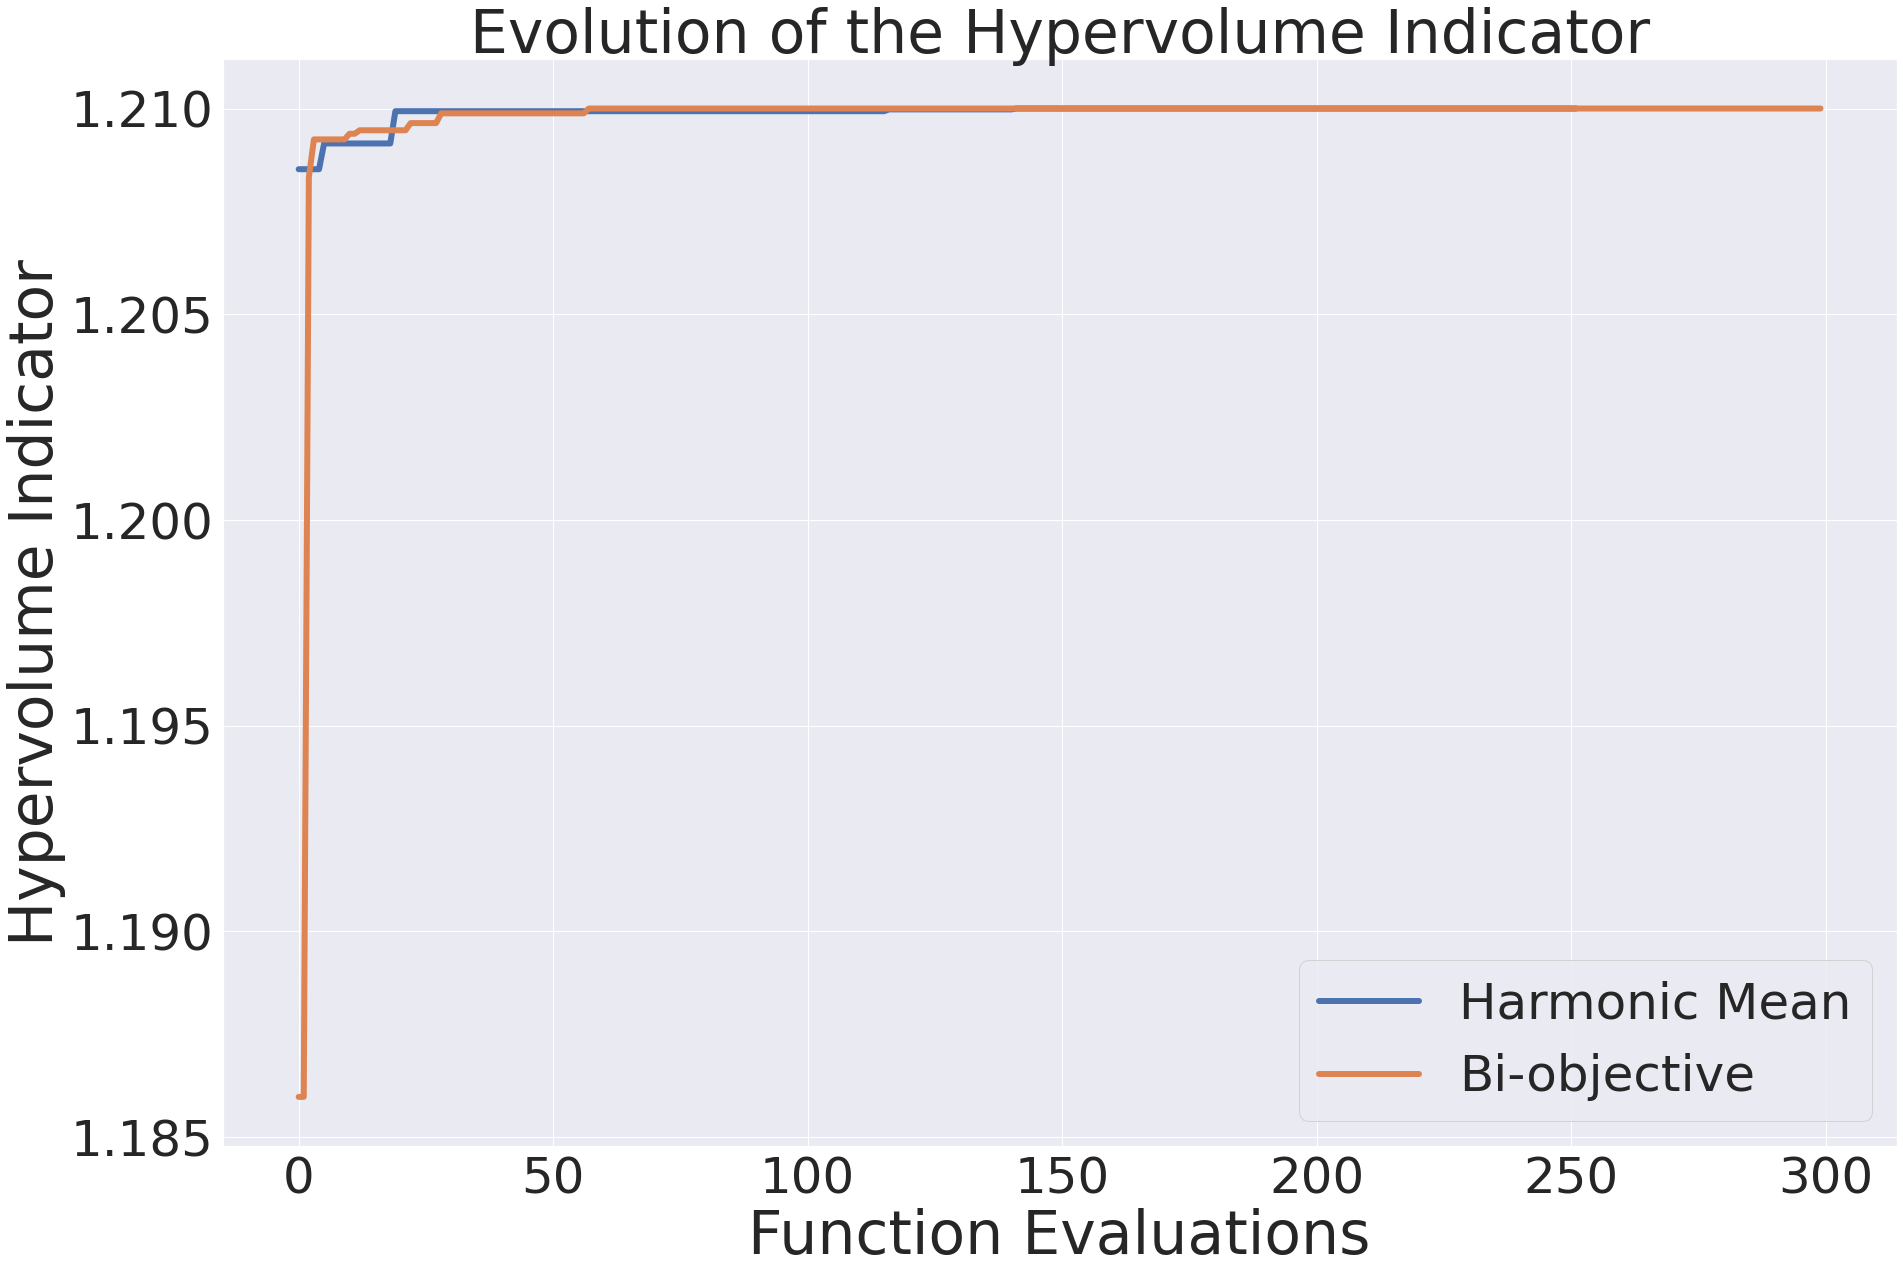

In [12]:
plt.figure(figsize=(30,20))
plt.plot(np.arange(hyper_volume.shape[0]), hyper_volume, label='Harmonic Mean', linewidth=6) 
plt.plot(np.arange(hyper_volume_bi.shape[0]), hyper_volume_bi, label='Bi-objective', linewidth=6)
plt.xlabel('Function Evaluations', fontsize=60)
plt.ylabel('Hypervolume Indicator', fontsize=60)
plt.title('Evolution of the Hypervolume Indicator', fontsize=60)
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
plt.legend(prop={'size': 50}) 

# plt.savefig('./paper_figures/cmapss_3_HM_vs_BI_HVI.pdf', format='pdf')
 



In [13]:
pareto_index = pg.non_dominated_front_2d(configs[['rmse_test', 'uncertainty_test']]) 

In [14]:
pareto_configs = configs.iloc[pareto_index] 

In [15]:
pareto_configs

,rmse_train,mae_train,r2_train,uncertainty_train,rmse_test,mae_test,r2_test,uncertainty_test,net_cfg
73,8.705719,4.697611,0.931783,16.187489,6.071040,3.340030,0.949876,17.714993,"{""num_rec"": 2, ""max_time"": 47, ""neuron_0"": 71,..."
28,8.247755,3.313368,0.931689,9.174892,7.125114,2.536192,0.917190,10.134741,"{""num_rec"": 1, ""max_time"": 20, ""neuron_0"": 53,..."
2,9.104768,6.402071,0.894290,5.716380,8.152480,5.686495,0.864017,6.193633,"{""num_rec"": 1, ""max_time"": 33, ""neuron_0"": 41,..."
3,11.655065,9.404483,0.832079,3.404232,10.770049,8.785693,0.745412,3.141193,"{""num_rec"": 1, ""max_time"": 35, ""neuron_0"": 80,..."
52,31.166383,23.016408,0.500469,0.173339,23.271972,18.439489,0.502649,0.168689,"{""num_rec"": 1, ""max_time"": 20, ""neuron_0"": 11,..."
184,37.898247,31.381972,-0.263566,0.103453,39.599492,33.886961,-0.728891,0.102074,"{""num_rec"": 2, ""max_time"": 44, ""neuron_0"": 53,..."
141,54.083114,49.531087,-9.328154,0.077244,59.077583,55.816885,-17.761271,0.058012,"{""num_rec"": 1, ""max_time"": 20, ""neuron_0"": 23,..."


(array([-2.5,  0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

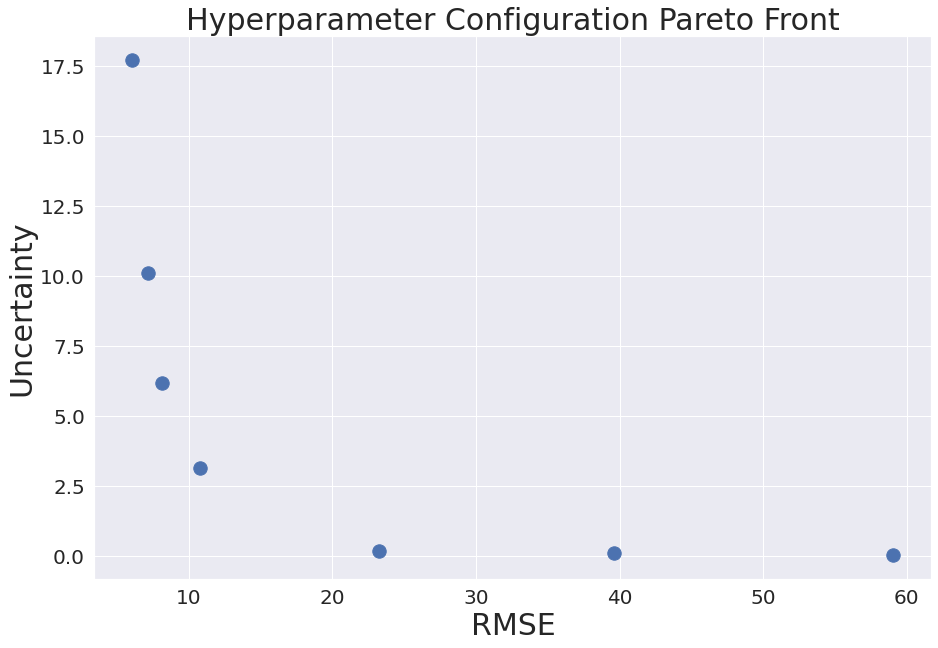

In [16]:
x = pareto_configs['rmse_test'].values
y = pareto_configs['uncertainty_test'].values
plt.figure(figsize=(15,10))
plt.scatter(x, y, s=180)
plt.xlabel('RMSE', fontsize=30)
plt.ylabel('Uncertainty', fontsize=30)
plt.title('Hyperparameter Configuration Pareto Front', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In [122]:
pareto_configs.loc[141].net_cfg

'{"num_rec": 1, "max_time": 20, "neuron_0": 23, "neuron_1": 66, "neuron_2": 31, "activation_rec_0": "sigmoid", "activation_rec_1": "tanh", "activation_rec_2": "sigmoid", "rec_dropout_norm_0": 0.25313218750000005, "rec_dropout_norm_1": 0.3199283203125, "rec_dropout_norm_2": 0.30938156250000004, "recurrent_dropout_0": 0.33750625000000006, "recurrent_dropout_1": 0.40781796875000004, "recurrent_dropout_2": 0.39375562500000005, "final_activation_0": "softplus", "final_activation_1": "softplus", "percentage": 61, "rul": 114, "rul_style": "nonlinear", "lr": "1e-5", "batch": "32", "num_den": 1, "neuron_den_0": 37, "neuron_den_1": 80, "neuron_den_2": 75, "activation_den_0": "tanh", "activation_den_1": "tanh", "activation_den_2": "tanh", "dropout_0": 0.2766975994873047, "dropout_1": 0.30938156250000004, "dropout_2": 0.45000500000000004}'

# Training full model on the best HP

In [18]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="-1"  # uncomment in case running ONLY on CPU is required

import tensorflow as tf
tf.random.set_seed(42)
from tensorflow.keras import backend as k
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import History
from tensorflow import keras
from tensorflow.keras.optimizers import Adam

from activations import Activate
from losses import CustomLoss
from preprocessing import build_data

import numpy as np
import pandas as pd
import math
from datetime import datetime

from sklearn import pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import json

In [123]:
net_cfg = {"num_rec": 2, "max_time": 47, "neuron_0": 71, "neuron_1": 63, "neuron_2": 45, "activation_rec_0": "sigmoid", "activation_rec_1": "tanh", "activation_rec_2": "tanh", 
"rec_dropout_norm_0": 0.17550805000000003, "rec_dropout_norm_1": 0.60750325, "rec_dropout_norm_2": 0.69750225, "recurrent_dropout_0": 0.68850235, "recurrent_dropout_1": 0.58950345, 
"recurrent_dropout_2": 0.40050555000000004, "final_activation_0": "exp", "final_activation_1": "softplus", "percentage": 63, "rul": 118, "rul_style": "nonlinear", "lr": "1e-4", 
"batch": "32", "num_den": 1, "neuron_den_0": 72, "neuron_den_1": 56, "neuron_den_2": 83, "activation_den_0": "tanh", "activation_den_1": "sigmoid", "activation_den_2": "tanh", 
"dropout_0": 0.34650615000000007, "dropout_1": 0.34650615000000007, "dropout_2": 0.8595004500000001}

net_cfg = {"num_rec": 1, "max_time": 20, "neuron_0": 53, "neuron_1": 63, "neuron_2": 72, "activation_rec_0": "tanh", "activation_rec_1": "tanh", "activation_rec_2": "tanh", 
"rec_dropout_norm_0": 0.08550905, "rec_dropout_norm_1": 0.8235008500000001, "rec_dropout_norm_2": 0.15750825000000002, "recurrent_dropout_0": 0.17550805000000003, 
"recurrent_dropout_1": 0.6345029500000001, "recurrent_dropout_2": 0.09450895000000001, "final_activation_0": "exp", "final_activation_1": "softplus", "percentage": 72, 
"rul": 121, "rul_style": "nonlinear", "lr": "1e-3", "batch": "64", "num_den": 1, "neuron_den_0": 35, "neuron_den_1": 94, "neuron_den_2": 17, "activation_den_0": "sigmoid", 
"activation_den_1": "tanh", "activation_den_2": "tanh", "dropout_0": 0.19350785, "dropout_1": 0.8595004500000001, "dropout_2": 0.10350885}

net_cfg = {"num_rec": 1, "max_time": 33, "neuron_0": 41, "neuron_1": 51, "neuron_2": 75, "activation_rec_0": "sigmoid", "activation_rec_1": "sigmoid", "activation_rec_2": "tanh", 
"rec_dropout_norm_0": 0.20250775000000004, "rec_dropout_norm_1": 0.73350185, "rec_dropout_norm_2": 0.78750125, "recurrent_dropout_0": 0.41850535000000005, 
"recurrent_dropout_1": 0.58050355, "recurrent_dropout_2": 0.61650315, "final_activation_0": "exp", "final_activation_1": "softplus", "percentage": 67, "rul": 113, 
"rul_style": "nonlinear", "lr": "1e-2", "batch": "128", "num_den": 1, "neuron_den_0": 67, "neuron_den_1": 32, "neuron_den_2": 94, "activation_den_0": "sigmoid", 
"activation_den_1": "sigmoid", "activation_den_2": "tanh", "dropout_0": 0.4905045500000001, "dropout_1": 0.28350685000000003, "dropout_2": 0.55350385}

net_cfg = {"num_rec": 1, "max_time": 35, "neuron_0": 80, "neuron_1": 16, "neuron_2": 36, "activation_rec_0": "sigmoid", "activation_rec_1": "sigmoid", "activation_rec_2": "sigmoid", 
"rec_dropout_norm_0": 0.3735058500000001, "rec_dropout_norm_1": 0.29250675000000004, "rec_dropout_norm_2": 0.65250275, "recurrent_dropout_0": 0.18450795000000003, 
"recurrent_dropout_1": 0.55350385, "recurrent_dropout_2": 0.04950945000000001, "final_activation_0": "exp", "final_activation_1": "softplus", "percentage": 69, "rul": 123, 
"rul_style": "nonlinear", "lr": "1e-2", "batch": "64", "num_den": 1, "neuron_den_0": 33, "neuron_den_1": 38, "neuron_den_2": 87, "activation_den_0": "sigmoid", 
"activation_den_1": "sigmoid", "activation_den_2": "sigmoid", "dropout_0": 0.77850135, "dropout_1": 0.4995044500000001, "dropout_2": 0.06750925}

net_cfg = {"num_rec": 1, "max_time": 20, "neuron_0": 11, "neuron_1": 47, "neuron_2": 15, "activation_rec_0": "sigmoid", "activation_rec_1": "tanh", "activation_rec_2": "sigmoid", 
"rec_dropout_norm_0": 0.76950145, "rec_dropout_norm_1": 0.022509750000000002, "rec_dropout_norm_2": 0.01350985, "recurrent_dropout_0": 0.67050255, "recurrent_dropout_1": 0.03150965000000001, 
"recurrent_dropout_2": 0.31050655000000005, "final_activation_0": "softplus", "final_activation_1": "softplus", "percentage": 66, "rul": 121, "rul_style": "nonlinear", "lr": "1e-5", 
"batch": "64", "num_den": 1, "neuron_den_0": 20, "neuron_den_1": 46, "neuron_den_2": 44, "activation_den_0": "sigmoid", "activation_den_1": "sigmoid", "activation_den_2": "tanh", 
"dropout_0": 0.38250575000000003, "dropout_1": 0.11250875, "dropout_2": 0.7425017500000001}

net_cfg = {"num_rec": 2, "max_time": 44, "neuron_0": 53, "neuron_1": 13, "neuron_2": 92, "activation_rec_0": "sigmoid", "activation_rec_1": "sigmoid", "activation_rec_2": "sigmoid", 
"rec_dropout_norm_0": 0.6720225111739104, "rec_dropout_norm_1": 0.7196297994693378, "rec_dropout_norm_2": 0.3205645823257169, "recurrent_dropout_0": 0.6413694002630076, 
"recurrent_dropout_1": 0.6413390604533223, "recurrent_dropout_2": 0.17983751384072064, "final_activation_0": "softplus", "final_activation_1": "softplus", "percentage": 65, 
"rul": 125, "rul_style": "nonlinear", "lr": "1e-5", "batch": "32", "num_den": 1, "neuron_den_0": 84, "neuron_den_1": 28, "neuron_den_2": 27, "activation_den_0": "tanh", 
"activation_den_1": "sigmoid", "activation_den_2": "sigmoid", "dropout_0": 0.7552125919860905, "dropout_1": 0.6183447212008668, "dropout_2": 0.11888671482048774}

net_cfg = {"num_rec": 1, "max_time": 20, "neuron_0": 23, "neuron_1": 66, "neuron_2": 31, "activation_rec_0": "sigmoid", "activation_rec_1": "tanh", "activation_rec_2": "sigmoid", 
"rec_dropout_norm_0": 0.25313218750000005, "rec_dropout_norm_1": 0.3199283203125, "rec_dropout_norm_2": 0.30938156250000004, "recurrent_dropout_0": 0.33750625000000006, 
"recurrent_dropout_1": 0.40781796875000004, "recurrent_dropout_2": 0.39375562500000005, "final_activation_0": "softplus", "final_activation_1": "softplus", "percentage": 61, 
"rul": 114, "rul_style": "nonlinear", "lr": "1e-5", "batch": "32", "num_den": 1, "neuron_den_0": 37, "neuron_den_1": 80, "neuron_den_2": 75, "activation_den_0": "tanh", 
"activation_den_1": "tanh", "activation_den_2": "tanh", "dropout_0": 0.2766975994873047, "dropout_1": 0.30938156250000004, "dropout_2": 0.45000500000000004}

In [124]:
cfg = {'cv': 10, 'shuffle': True,
'random_state': 21,
'mask_value': -99,
'reps': 30,
'epochs': 20,
'batches': 64}

In [125]:
def weibull_mean(alpha, beta):
    return alpha * math.gamma(1 + 1/beta)

In [126]:
def network(train_X, train_y, net_cfg, cfg):
    k.set_epsilon(1e-10)
    strategy = tf.distribute.MirroredStrategy()

    history = History()
    nan_terminator = callbacks.TerminateOnNaN()
    reduce_lr = callbacks.ReduceLROnPlateau(monitor='loss')
    early_stopping = callbacks.EarlyStopping(monitor='loss', patience=5)
    # checkpoint_filepath = './saved_models/cp-{epoch:04d}.ckpt'
    # checkpoint = callbacks.ModelCheckpoint(filepath=checkpoint_filepath, monitor='loss', verbose=1)
    # logdir="logs/test1" #+ datetime.now().strftime("%Y%m%d-%H%M%S")
    # tensorboard = callbacks.TensorBoard(log_dir=logdir)

    window = train_X.shape[1]
    n_features = train_X.shape[2]

    with strategy.scope():  # Create a MirroredStrategy.

        inputs = keras.Input(shape=(window, n_features))
        masking_layer = keras.layers.Masking(mask_value=cfg['mask_value'])(inputs)

        # recurrent layers
        last = 0
        if net_cfg["num_rec"] > 1:
            for i in np.arange(net_cfg["num_rec"] - 1):
                masking_layer = keras.layers.GRU(
                    net_cfg["neuron_" + str(i)],
                    activation=net_cfg["activation_rec_" + str(i)],
                    dropout=net_cfg["rec_dropout_norm_" + str(i)],
                    recurrent_dropout=net_cfg["recurrent_dropout_" + str(i)],
                    return_sequences=True,
                )(masking_layer)
            last = i + 1
            
        gru_last = keras.layers.GRU(
        net_cfg["neuron_" + str(last)],
        activation=net_cfg["activation_rec_" + str(last)],
        dropout=net_cfg["rec_dropout_norm_" + str(last)],
        recurrent_dropout=net_cfg["recurrent_dropout_" + str(last)],
        return_sequences=False,
        )(masking_layer)

        # dense layers
        last = 0
        if net_cfg["num_den"] > 1:
            for i in np.arange(net_cfg["num_den"] - 1):
                gru_last = keras.layers.Dense(
                net_cfg["neuron_den_" + str(i)],
                activation=net_cfg["activation_den_" + str(i)],
                )(gru_last)
                gru_last = keras.layers.Dropout(
                    rate=net_cfg["dropout_" + str(i)],
                )(gru_last)
            last = i + 1
     
        dense_ = keras.layers.Dense(2)(gru_last)
        custom_activation = Activate(net_cfg=net_cfg)
        outputs = keras.layers.Activation(custom_activation)(dense_)

        model = keras.Model(inputs=inputs, outputs=outputs, name="weibull_params")

        # rmse = tf.keras.metrics.RootMeanSquaredError()
        model.compile(loss=CustomLoss(kind='continuous', reduce_loss=True), optimizer=Adam(lr=eval(net_cfg['lr']),
                                                                                        clipvalue=0.5))
    model.summary()  # uncomment for debugging

    batch_size=eval(net_cfg['batch'])
    model.fit(train_X, train_y,
              epochs=cfg['epochs'],
              batch_size=eval(net_cfg['batch']),
              verbose=1,
              callbacks=[nan_terminator, history, reduce_lr, early_stopping],  #, checkpoint, tensorboard], 
              workers=32)

    return model, history



In [127]:
def load_data():

    np.random.seed(42)

    id_col = 'unit_number'
    time_col = 'time'
    feature_cols = ['op_setting_1', 'op_setting_2', 'op_setting_3'] + ['sensor_measurement_{}'.format(x) for x in
                                                                       range(1, 22)]
    column_names = [id_col, time_col] + feature_cols

    train_x_orig = pd.read_csv('./DataSets/CMAPSS/train_FD003.csv', header=None, sep='\s+', decimal=".")
    train_x_orig.columns = column_names

    test_x_orig = pd.read_csv('./DataSets/CMAPSS/test_FD003.csv', header=None, sep='\s+', decimal=".")
    test_x_orig.columns = column_names

    test_y_orig = pd.read_csv('./DataSets/CMAPSS/RUL_FD003.csv', header=None, names=['T'])

    # Make engine numbers and days zero-indexed
    train_x_orig.iloc[:, 0:2] -= 1
    test_x_orig.iloc[:, 0:2] -= 1

    # Pre-processing data
    scaler = pipeline.Pipeline(steps=[
        ('minmax', MinMaxScaler(feature_range=(-1, 1))),
        ('remove_constant', VarianceThreshold())])

    train = train_x_orig.copy()
    train = np.concatenate([train[['unit_number', 'time']], scaler.fit_transform(train[feature_cols])], axis=1)

    train_x, train_y = build_data(units=train[:, 0], time=train[:, 1], x=train[:, 2:], max_time=net_cfg['max_time'],
                                    is_test=False, mask_value=cfg['mask_value'],
                                    original_data=None, net_cfg = net_cfg, label=net_cfg['rul_style'])

    test_or = test_x_orig.copy()
    test_or = np.concatenate([test_or[['unit_number', 'time']], scaler.transform(test_or[feature_cols])], axis=1)


    # Preparing data for the RNN (numpy arrays)
    test_or, _ = build_data(units=test_or[:, 0], time=test_or[:, 1], x=test_or[:, 2:], max_time=net_cfg['max_time'],
                                    is_test=True, mask_value=-99,
                                    original_data=np.repeat(200, test_or.shape[0]), net_cfg = net_cfg, label=net_cfg['rul_style'])

    

    return train_x, train_y, test_or, test_y_orig, train_x_orig


In [128]:
train_x, train_y, test_x, test_y, train_x_orig = load_data()

100%|██████████| 100/100 [00:00<00:00, 9460.69it/s]


In [129]:
print('train_x', train_x.shape, 'train_y', train_y.shape, 'test_x', test_x.shape, 'test_y', test_y.shape)


train_x (24720, 20, 18) train_y (24720, 1) test_x (100, 20, 18) test_y (100, 1)


In [130]:
model = tf.keras.models.load_model('./Harmonic_Mean_Results/dataset_3/141/saved_models_23_2/cp-0100.ckpt/', custom_objects={"CustomLoss": CustomLoss, "Activate": Activate})

In [131]:
model.summary()

Model: "weibull_params"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 20, 18)]          0         
_________________________________________________________________
masking (Masking)            (None, 20, 18)            0         
_________________________________________________________________
gru (GRU)                    (None, 23)                2967      
_________________________________________________________________
dense (Dense)                (None, 2)                 48        
_________________________________________________________________
activation (Activation)      (None, 2)                 0         
Total params: 3,015
Trainable params: 3,015
Non-trainable params: 0
_________________________________________________________________


In [132]:
reps = 30
test_predict_1 = []
test_predict_2 = []
for i in range(cfg["reps"]):
    tf.random.set_seed(i)
    test_predict = model(test_x, training=True).numpy()
    test_predict_1.append(
        test_predict[:, 0].reshape(test_predict[:, 0].shape[0], 1)
    )
    test_predict_2.append(
        test_predict[:, 1].reshape(test_predict[:, 1].shape[0], 1)
    )

test_predict_1_median = np.median(np.hstack(test_predict_1), axis=1)
test_predict_2_median = np.median(np.hstack(test_predict_2), axis=1)
test_predict_1_median = test_predict_1_median.reshape(
    test_predict_1_median.shape[0], 1
)
test_predict_2_median = test_predict_2_median.reshape(
    test_predict_2_median.shape[0], 1
)
test_predict_1_std = np.std(np.hstack(test_predict_1), axis=1)
test_predict_2_std = np.std(np.hstack(test_predict_2), axis=1)
test_predict_1_std = test_predict_1_std.reshape(test_predict_1_std.shape[0], 1)
test_predict_2_std = test_predict_2_std.reshape(test_predict_2_std.shape[0], 1)

test_predict = np.hstack(
    [
        test_predict_1_median,
        test_predict_2_median,
        test_predict_1_std,
        test_predict_2_std,
    ]
)

test_predict = np.resize(
    test_predict, (test_x.shape[0], 4)
)  # changed from 2 to 4
test_result = np.concatenate((test_y, test_predict), axis=1)
test_results_df = pd.DataFrame(
    test_result,
    columns=["T", "median_alpha", "median_beta", "std_alpha", "std_beta"],
)

test_results_df["predicted_mu"] = test_results_df[
    ["median_alpha", "median_beta"]
].apply(lambda row: weibull_mean(row[0], row[1]), axis=1)
test_results_df["uncertainty"] = np.mean(test_predict[:, 2:], axis=1)

In [133]:
train_predict_1 = []
train_predict_2 = []

success = True

for i in range(cfg["reps"]):
    tf.random.set_seed(i)
    train_predict = model(train_x, training=True).numpy()
    train_predict_1.append(
        train_predict[:, 0].reshape(train_predict[:, 0].shape[0], 1)
    )
    train_predict_2.append(
        train_predict[:, 1].reshape(train_predict[:, 1].shape[0], 1)
    )

train_predict_1_median = np.median(np.hstack(train_predict_1), axis=1)
train_predict_2_median = np.median(np.hstack(train_predict_2), axis=1)
train_predict_1_median = train_predict_1_median.reshape(
    train_predict_1_median.shape[0], 1
)
train_predict_2_median = train_predict_2_median.reshape(
    train_predict_2_median.shape[0], 1
)
train_predict_1_std = np.std(np.hstack(train_predict_1), axis=1)
train_predict_2_std = np.std(np.hstack(train_predict_2), axis=1)
train_predict_1_std = train_predict_1_std.reshape(
    train_predict_1_std.shape[0], 1
)
train_predict_2_std = train_predict_2_std.reshape(
    train_predict_2_std.shape[0], 1
)

train_predict = np.hstack(
    [
        train_predict_1_median,
        train_predict_2_median,
        train_predict_1_std,
        train_predict_2_std,
    ]
)

train_predict = np.resize(train_predict, (train_x.shape[0], 4))
train_result = np.concatenate((train_y, train_predict), axis=1)
train_results_df = pd.DataFrame(
    train_result,
    columns=["T", "median_alpha", "median_beta", "std_alpha", "std_beta"],
)
train_results_df["unit_number"] = train_x_orig["unit_number"].to_numpy()
train_results_df["time"] = train_x_orig["time"].to_numpy()

train_results_df["predicted_mu"] = train_results_df[
    ["median_alpha", "median_beta"]
].apply(lambda row: weibull_mean(row[0], row[1]), axis=1)
train_results_df["uncertainty"] = np.mean(train_predict[:, 2:], axis=1)

In [134]:
columns = [
        "rmse_train",
        "mae_train",
        "r2_train",
        "uncertainty_train",
        "rmse_test",
        "mae_test",
        "r2_test",
        "uncertainty_test",
        "net_cfg",
    ]
results = pd.DataFrame(columns=columns)

rmse_train = []
r2_train = []
mae_train = []
std_train = []

rmse_test = []
r2_test = []
mae_test = []
std_test = []

In [135]:
# Performance evaluation
# train:
rmse_train.append(
    np.sqrt(
        mean_squared_error(
            train_results_df["predicted_mu"], train_results_df["T"]
        )
    )
)
mae_train.append(
    (
        mean_absolute_error(
            train_results_df["predicted_mu"], train_results_df["T"]
        )
    )
)
r2_train.append(
    r2_score(train_results_df["predicted_mu"], train_results_df["T"])
)
std_train.append(train_results_df["uncertainty"].mean())

# test:
rmse_test.append(
    np.sqrt(
        mean_squared_error(
            test_results_df["predicted_mu"], test_results_df["T"]
        )
    )
)
mae_test.append(
    (mean_absolute_error(test_results_df["predicted_mu"], test_results_df["T"]))
)
r2_test.append(r2_score(test_results_df["predicted_mu"], test_results_df["T"]))
std_test.append(test_results_df["uncertainty"].mean())

# registering results
results["rmse_train"] = rmse_train
results["mae_train"] = mae_train
results["r2_train"] = r2_train
results["uncertainty_train"] = std_train
results["rmse_test"] = rmse_test
results["mae_test"] = mae_test
results["r2_test"] = r2_test
results["uncertainty_test"] = std_test
results["net_cfg"] = json.dumps(net_cfg)

In [32]:
results73 = results

In [49]:
results28 = results

In [67]:
results2 = results

In [85]:
results3 = results

In [102]:
results52 = results

In [119]:
results184 = results

In [136]:
results141 = results

In [148]:
Results=pd.concat([results73, results28, results2, results3, results52, results184, results141])
Results.to_csv('./Harmonic_Mean_Results/dataset_3/Results', index=False)

In [150]:
Results

,rmse_train,mae_train,r2_train,uncertainty_train,rmse_test,mae_test,r2_test,uncertainty_test,net_cfg
0,11.198874,6.865934,0.871704,10.166431,30.833039,24.455210,0.154934,12.066687,"{""num_rec"": 2, ""max_time"": 47, ""neuron_0"": 71,..."
0,7.213661,3.155071,0.948747,10.041192,33.930961,26.966734,0.074047,11.361874,"{""num_rec"": 1, ""max_time"": 20, ""neuron_0"": 53,..."
0,6.998554,4.394453,0.947529,9.436652,26.095714,21.423265,0.390907,10.584168,"{""num_rec"": 1, ""max_time"": 33, ""neuron_0"": 41,..."
0,7.355656,4.445045,0.950789,9.194135,35.237890,28.044185,0.099312,10.168129,"{""num_rec"": 1, ""max_time"": 35, ""neuron_0"": 80,..."
0,536.648666,375.643814,-0.821030,0.082591,446.401200,313.600620,-0.761848,0.083869,"{""num_rec"": 1, ""max_time"": 20, ""neuron_0"": 11,..."
0,359.318599,283.558906,-1.482914,0.122312,375.269081,314.323101,-2.478247,0.123380,"{""num_rec"": 2, ""max_time"": 44, ""neuron_0"": 53,..."
0,100.068870,66.192085,-0.084678,0.070684,67.551353,47.358323,0.213717,0.069875,"{""num_rec"": 1, ""max_time"": 20, ""neuron_0"": 23,..."


In [151]:
pareto_configs

,rmse_train,mae_train,r2_train,uncertainty_train,rmse_test,mae_test,r2_test,uncertainty_test,net_cfg
73,8.705719,4.697611,0.931783,16.187489,6.071040,3.340030,0.949876,17.714993,"{""num_rec"": 2, ""max_time"": 47, ""neuron_0"": 71,..."
28,8.247755,3.313368,0.931689,9.174892,7.125114,2.536192,0.917190,10.134741,"{""num_rec"": 1, ""max_time"": 20, ""neuron_0"": 53,..."
2,9.104768,6.402071,0.894290,5.716380,8.152480,5.686495,0.864017,6.193633,"{""num_rec"": 1, ""max_time"": 33, ""neuron_0"": 41,..."
3,11.655065,9.404483,0.832079,3.404232,10.770049,8.785693,0.745412,3.141193,"{""num_rec"": 1, ""max_time"": 35, ""neuron_0"": 80,..."
52,31.166383,23.016408,0.500469,0.173339,23.271972,18.439489,0.502649,0.168689,"{""num_rec"": 1, ""max_time"": 20, ""neuron_0"": 11,..."
184,37.898247,31.381972,-0.263566,0.103453,39.599492,33.886961,-0.728891,0.102074,"{""num_rec"": 2, ""max_time"": 44, ""neuron_0"": 53,..."
141,54.083114,49.531087,-9.328154,0.077244,59.077583,55.816885,-17.761271,0.058012,"{""num_rec"": 1, ""max_time"": 20, ""neuron_0"": 23,..."


In [152]:
pareto_configs.reset_index(drop=True, inplace=True) 

(array([-2.5,  0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

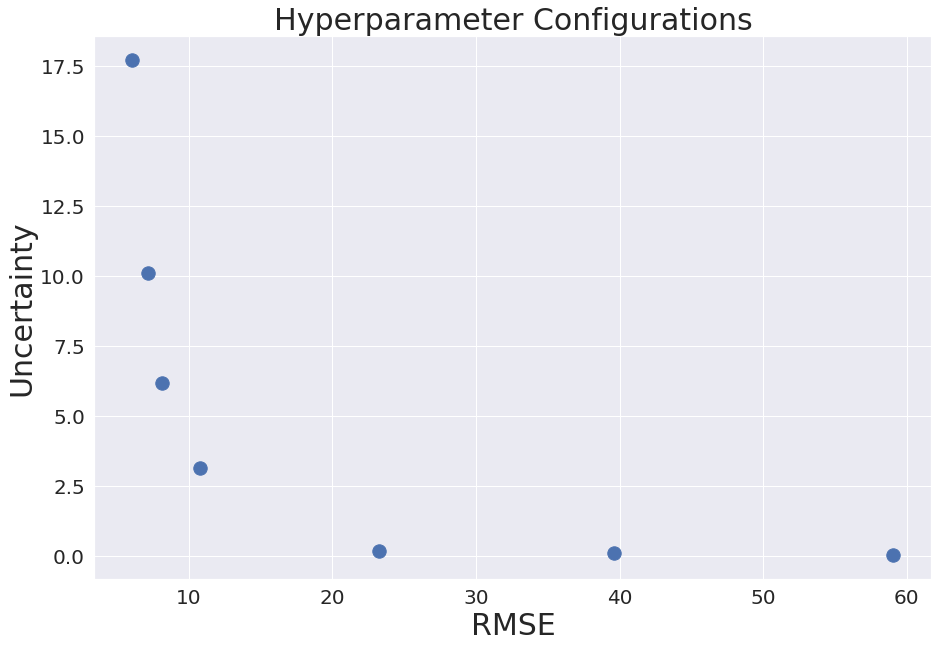

In [153]:
x = pareto_configs['rmse_test'].values
y = pareto_configs['uncertainty_test'].values
plt.figure(figsize=(15,10))
# plt.scatter(x[0], y[0], s=400, facecolors='red')
plt.scatter(x, y, s=180)
plt.xlabel('RMSE', fontsize=30)
plt.ylabel('Uncertainty', fontsize=30)
plt.title('Hyperparameter Configurations', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In [154]:
Results['rank'] = pareto_configs.index 

In [155]:
Results 

,rmse_train,mae_train,r2_train,uncertainty_train,rmse_test,mae_test,r2_test,uncertainty_test,net_cfg,rank
0,11.198874,6.865934,0.871704,10.166431,30.833039,24.455210,0.154934,12.066687,"{""num_rec"": 2, ""max_time"": 47, ""neuron_0"": 71,...",0
0,7.213661,3.155071,0.948747,10.041192,33.930961,26.966734,0.074047,11.361874,"{""num_rec"": 1, ""max_time"": 20, ""neuron_0"": 53,...",1
0,6.998554,4.394453,0.947529,9.436652,26.095714,21.423265,0.390907,10.584168,"{""num_rec"": 1, ""max_time"": 33, ""neuron_0"": 41,...",2
0,7.355656,4.445045,0.950789,9.194135,35.237890,28.044185,0.099312,10.168129,"{""num_rec"": 1, ""max_time"": 35, ""neuron_0"": 80,...",3
0,536.648666,375.643814,-0.821030,0.082591,446.401200,313.600620,-0.761848,0.083869,"{""num_rec"": 1, ""max_time"": 20, ""neuron_0"": 11,...",4
0,359.318599,283.558906,-1.482914,0.122312,375.269081,314.323101,-2.478247,0.123380,"{""num_rec"": 2, ""max_time"": 44, ""neuron_0"": 53,...",5
0,100.068870,66.192085,-0.084678,0.070684,67.551353,47.358323,0.213717,0.069875,"{""num_rec"": 1, ""max_time"": 20, ""neuron_0"": 23,...",6


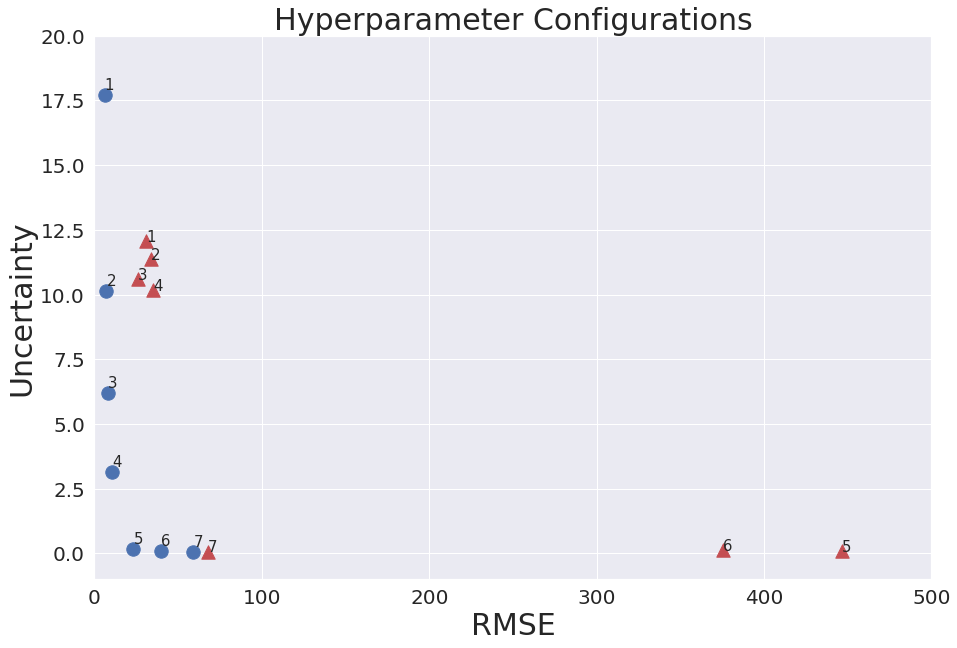

In [163]:
x = Results['rmse_test'].values
y = Results['uncertainty_test'].values
x_prime = pareto_configs['rmse_test'].values
y_prime = pareto_configs['uncertainty_test'].values
plt.figure(figsize=(15,10))
# plt.scatter(x[0], y[0], s=400, facecolors='red')
plt.scatter(x, y, marker='^',s=180, c='r')
plt.scatter(x_prime, y_prime,s=180)
plt.xlabel('RMSE', fontsize=30)
plt.ylabel('Uncertainty', fontsize=30)
plt.title('Hyperparameter Configurations', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(0,500)
plt.ylim(-1,20)

for i, txt in enumerate(Results['rank']):
    plt.annotate(txt+1, (x[i], y[i]), fontsize=15)

for i, txt in enumerate(pareto_configs.index):
    plt.annotate(txt+1, (x_prime[i], y_prime[i]+0.2), fontsize=15)

plt.savefig('./paper_figures/cmapss_3_obj_space_harmonic_mean.pdf', format='pdf')


In [28]:
# Results = pd.read_csv('./Final_experiments/dataset_3/Results')